# Tabular Action-Value Methods
(https://webdocs.cs.ualberta.ca/~sutton/book/ebook/the-book.html)

* State and Action space are small enough for the approximate action-value function to be represented as array or table
* This chapter describes three fundamental classes of methods to solve MDP: **dynamic programming**, **Monte Carlo methods** and **temporal-difference learning**

## Dynamic Programming (DP)

* Given a perfect model as MDP an optimal policy can be computed

### Policy Evaluation

* Compute state-value function $v_\pi$ for an arbitrary policy $\pi$

Given: 
$$v_{\pi}(s) = I\!E_{\pi}\biggr[R_{t+1} + \gamma v_\pi(S_{t+1}) \ \vert \ S_t = s\biggr]\\
= \sum_a \pi(a \ \vert \ s) \sum_{s'}p(s'\ \vert \ s,a) \biggr[ r(s,a,s')+\gamma v_\pi(s') \biggr] \ \ \ (\mathrm{4.4})$$

* If the dynamics are completely known, then *(4.4)* is a system of $ \ \vert \ S \ \vert \ $ simultaneous linear equations in $ \ \vert \ S \ \vert \ $ unknowns

**Iterative policy evaluation**:
$$v_{k+1}(s) = \sum_a \pi(a \ \vert \ s) \sum_{s'} p(s' \ \vert \ s,a) \biggr[ r(s,a,s') + \gamma v_k(s') \biggr]$$

* as $k \rightarrow \infty$, the sequence $v_k$ converges to $v_\pi$

Given the Gridworld below with non-terminal states $S=\{1,2,...,14\}$ and actions in each state $A=\{\mathrm{up}, \mathrm{down}, \mathrm{right}, \mathrm{left}\}$

* $R=-1$ on all transitions

* **[]** represents the terminal state

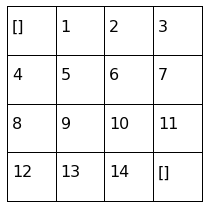

In [46]:
G = np.array([
        [0, 1, 2, 3],
        [4, 5, 6, 7],
        [8, 9, 10, 11],
        [12, 13, 14, 0]])


fig, ax = plt.subplots(ncols=1, figsize=(3,3))
plot_grid(ax, G, lookup={'0':'[]'}, font_size=16)

plt.tight_layout()
plt.show()

In [79]:
class Gridworld:
    """Gridworld
    Names of the states:
    [0][1][2][3]
    [4][5][6][7]
    ...
    """
    
    def __init__(self, w, h, default_r=-1, R=None, T=None):
        self.w = w
        self.h = h
        self.T = T
        self.R = R
        self.default_r = default_r
        self.max_state = w * h - 1
    
    def get_pos(self, s):
        if self.max_state < s:
            s = self.max_state
        x = int(s % self.w)
        y = int(s / self.w)
        return x, y

    def get_state(self, pos):
        (x, y) = pos
        s = y * self.w
        s += x
        return s
    
    def p(self, s, sp, a):
        x1, y1 = self.get_pos(s)
        x2, y2 = self.get_pos(sp)
        
        # bordering:
        
    
gw = Gridworld(4, 4)

In [43]:
# Example: Grid-world
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot_grid(ax, G, grid_size=10, font_size=24, lookup=None):
    h = G.shape[0]
    w = G.shape[1]
    
    TOP = h * grid_size
    hlf = grid_size/2
    size = font_size
    
    for x_ in range(0, w):
        X = []
        Y = []
        for y_ in range(0, h):
            x = x_ * grid_size
            y = y_ * grid_size
            X.append(x)
            Y.append(y)
            X.append(x+grid_size)
            Y.append(y)
            X.append(x+grid_size)
            Y.append(y+grid_size)
            X.append(x)
            Y.append(y+grid_size)
            X.append(x)
            Y.append(y)
            
            value = G[y_,x_]
            if lookup is not None and str(value) in lookup:
                value = lookup[str(value)]
            if isinstance(value, float):
                value = "{0:.2f}".format(value)
            
            ax.text(x + hlf-4, TOP - y - hlf, str(value), size=size)
        ax.plot(X, Y, 'k-', lw=1)
        
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])